In [2]:
from datetime import date
from pyspark.sql import SparkSession, DataFrame

import constants
from scripts import games, developers, genres, developers, predictions, platforms, publisher

from utils.spark_utils import SparkUtils
from pyspark.sql import functions as f


spark_session: SparkSession = SparkUtils.get_spark_session(app_name="app")
df: DataFrame = spark_session.read.csv(
    path=constants.DATASET_FULLPATH,
    sep=",",
    header=True,
    schema=SparkUtils.DATASET_STRUCT,
).drop("img")

df.show(50)

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/06/20 16:29:11 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


+--------------------+-------+----------------+--------------------+--------------------+------------+-----------+--------+--------+---------+-----------+------------+-----------+
|               title|console|           genre|           publisher|           developer|critic_score|total_sales|na_sales|jp_sales|pal_sales|other_sales|release_date|last_update|
+--------------------+-------+----------------+--------------------+--------------------+------------+-----------+--------+--------+---------+-----------+------------+-----------+
|  Grand Theft Auto V|    PS3|          Action|      Rockstar Games|      Rockstar North|         9.4|      20.32|    6.37|    0.99|     9.85|       3.12|  2013-09-17|       NULL|
|  Grand Theft Auto V|    PS4|          Action|      Rockstar Games|      Rockstar North|         9.7|      19.39|    6.06|     0.6|     9.71|       3.02|  2014-11-18| 2018-01-03|
|Grand Theft Auto:...|    PS2|          Action|      Rockstar Games|      Rockstar North|         9.

24/06/20 16:29:25 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors


+--------------------+--------+
|               title|na_sales|
+--------------------+--------+
|  Grand Theft Auto V|   26.19|
|Call of Duty: Bla...|   17.65|
|Call of Duty: Mod...|   15.57|
|Call of Duty: Ghosts|   15.06|
|Call of Duty: Bla...|   14.12|
|Call of Duty: Mod...|   13.54|
|Call of Duty: Bla...|   12.82|
| Grand Theft Auto IV|    11.6|
|Guitar Hero III: ...|   11.14|
|Call of Duty: Adv...|   10.66|
|Call of Duty 4: M...|   10.06|
|The Elder Scrolls...|    9.52|
|Call of Duty: Wor...|    9.38|
|           Minecraft|    9.07|
|Red Dead Redempti...|    9.02|
|LEGO Star Wars: T...|    8.95|
|  Call of Duty: WWII|    8.49|
|Grand Theft Auto:...|    8.41|
|       Battlefield 3|    8.22|
|       Madden NFL 06|    7.68|
|LEGO Batman: The ...|    7.67|
|Call of Duty: Bla...|    7.37|
|       Madden NFL 08|    7.13|
|         Halo: Reach|    7.08|
|Grand Theft Auto III|    6.99|
|     Madden NFL 2005|    6.85|
|LEGO Indiana Jone...|    6.77|
|              Halo 4|    6.72|
|       

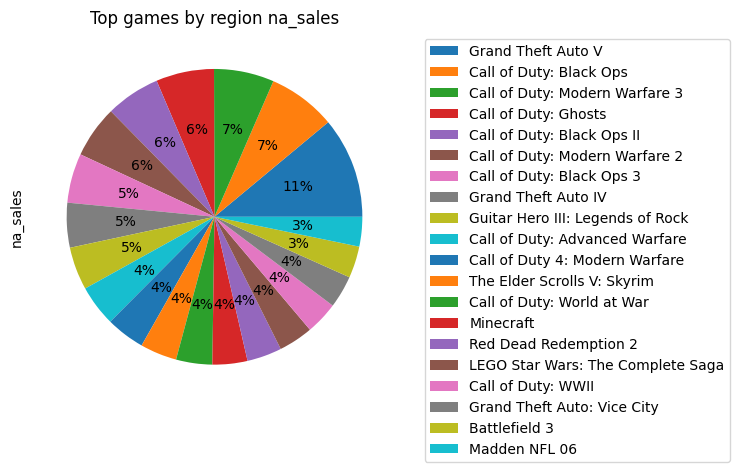

DataFrame[title: string, na_sales: double]

In [3]:
games.get_popular_games_by_region(df, "na_sales")

/home/progger/Projects/bigdata/game_sales/scripts/genres/top_genres_by_score.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df["genre"], y=df["critic_score"], palette=palette)
/home/progger/Projects/bigdata/game_sales/scripts/genres/top_genres_by_score.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df["genre"], y=df["total_sales"], palette=palette)


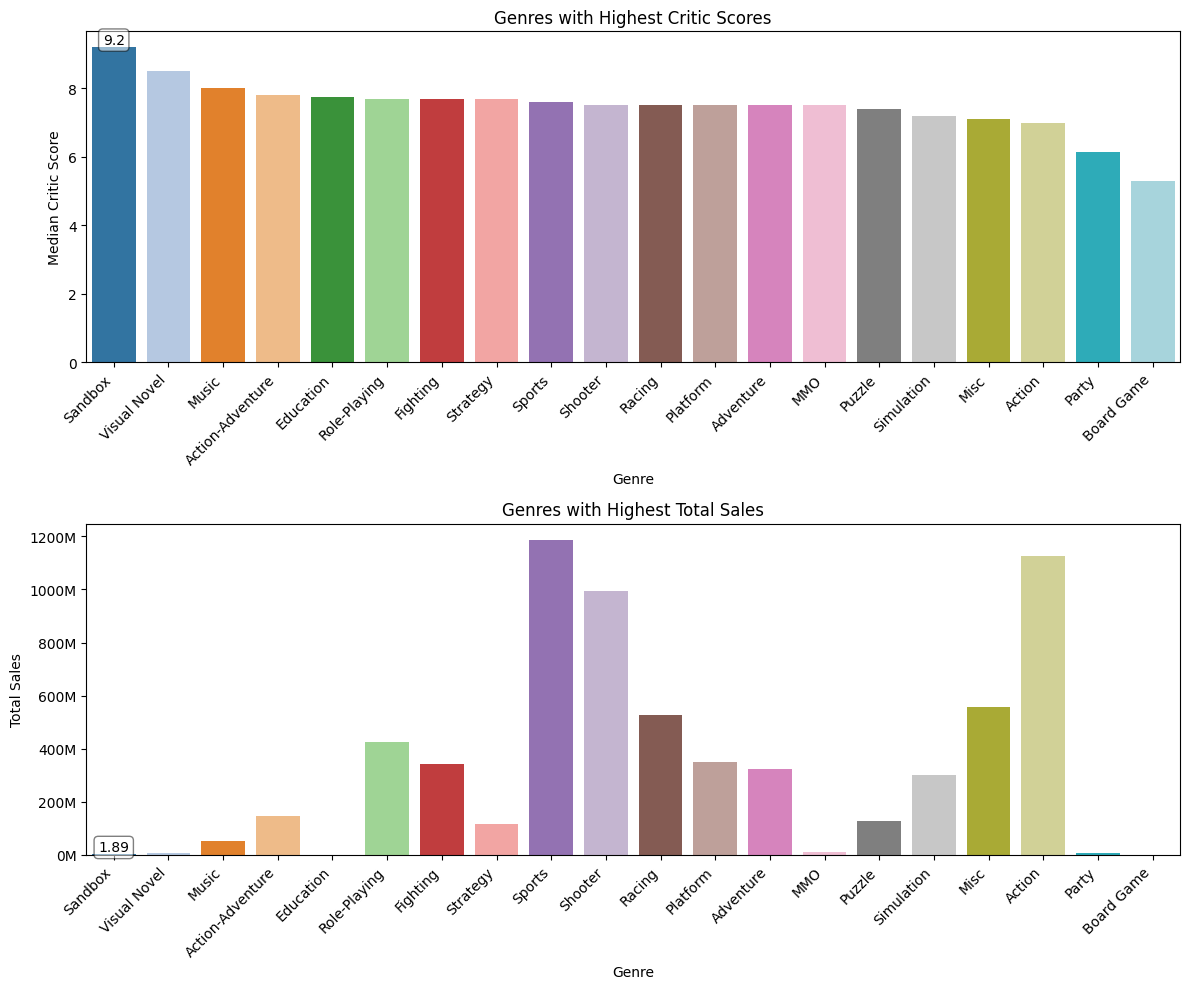

In [4]:
genres.get_top_genres_by_critic_score_and_sales(df)

Correlation between critic_score and na_sales: 0.3603082987235861
Correlation between critic_score and jp_sales: 0.14743267236534344
Correlation between critic_score and pal_sales: 0.3152068070313734
Correlation between critic_score and other_sales: 0.3206361999344065
Correlation between critic_score and total_sales: 0.3696868028666367


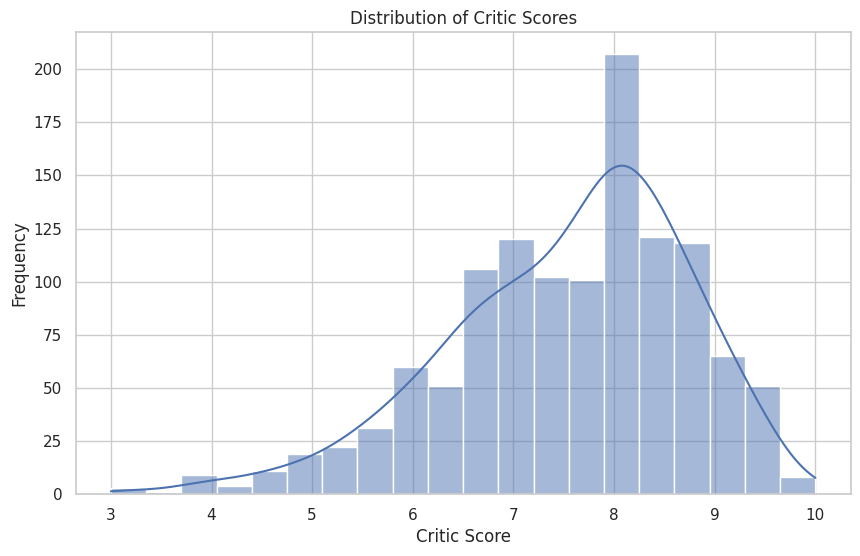

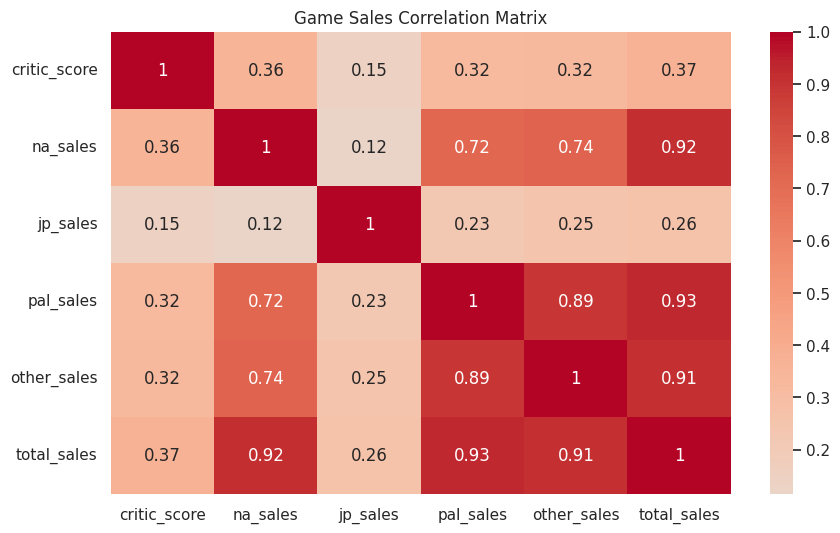

In [5]:
games.game_sale_estimates(df)

+----------------+---------+
|genre           |pal_sales|
+----------------+---------+
|Action          |342.52   |
|Sports          |341.92   |
|Shooter         |324.74   |
|Racing          |179.14   |
|Misc            |146.71   |
|Platform        |99.39    |
|Adventure       |91.52    |
|Role-Playing    |91.02    |
|Simulation      |86.86    |
|Fighting        |79.84    |
|Action-Adventure|59.52    |
|Strategy        |27.05    |
|Puzzle          |25.78    |
|Music           |15.02    |
|MMO             |2.94     |
|Party           |1.81     |
|Sandbox         |0.56     |
|Board Game      |0.22     |
|Education       |0.2      |
|Visual Novel    |0.07     |
+----------------+---------+



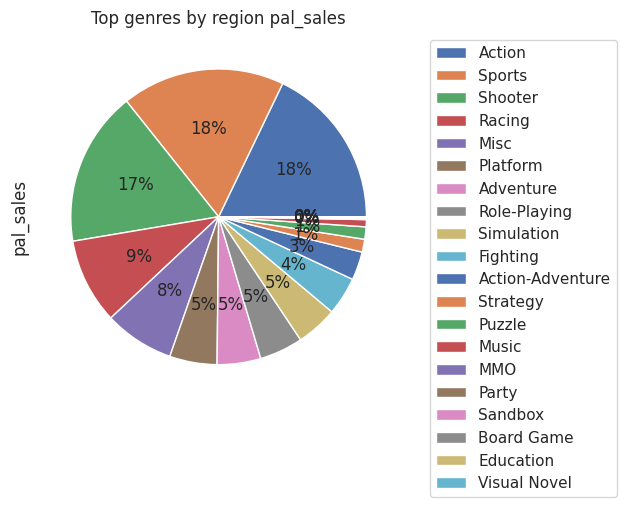

DataFrame[genre: string, pal_sales: double]

In [6]:
genres.get_popular_genres_by_region(df, "pal_sales")

+-------+--------+
|console|jp_sales|
+-------+--------+
|PS4    |27.04   |
|3DS    |20.43   |
|PSV    |15.71   |
|PS3    |6.65    |
|NS     |4.23    |
|WiiU   |1.67    |
|PSP    |1.17    |
|GBA    |0.64    |
|PSN    |0.23    |
|XOne   |0.22    |
|SAT    |0.15    |
|PS2    |0.14    |
|X360   |0.02    |
|DS     |0.02    |
|PC     |NULL    |
|Amig   |NULL    |
|Arc    |NULL    |
|OR     |NULL    |
|iOS    |NULL    |
|OSX    |NULL    |
|WinP   |NULL    |
|SNES   |NULL    |
|Linux  |NULL    |
|GB     |NULL    |
|WW     |NULL    |
|All    |NULL    |
|Series |NULL    |
|2600   |NULL    |
|XS     |NULL    |
|Wii    |NULL    |
|PS5    |NULL    |
|And    |NULL    |
|NES    |NULL    |
|PS     |NULL    |
|DC     |NULL    |
|GEN    |NULL    |
|XBL    |NULL    |
|PCFX   |NULL    |
|DSiW   |NULL    |
|SCD    |NULL    |
|BRW    |NULL    |
|VC     |NULL    |
|Ouya   |NULL    |
|Lynx   |NULL    |
+-------+--------+



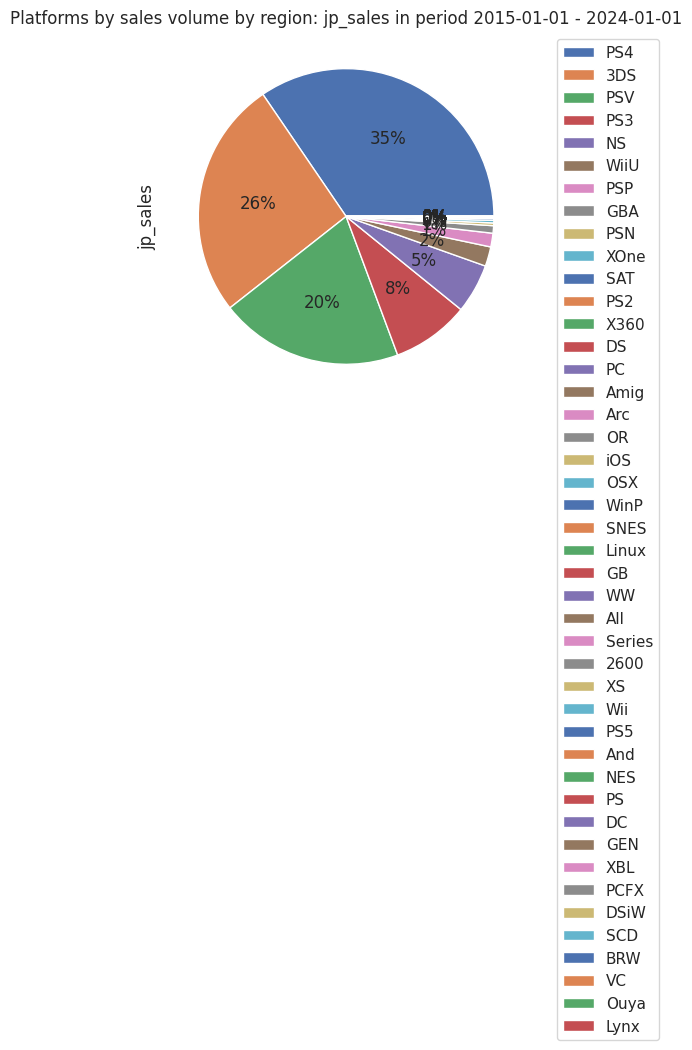

DataFrame[console: string, jp_sales: double]

In [7]:
platforms.get_popular_platforms_by_region(df, "jp_sales", date(2015, 1, 1), date(2024, 1, 1))

+-----------------------------------------------------------------------------+-------------------+--------------------+--------------------+--------------------+
|title                                                                        |na_sales           |jp_sales            |pal_sales           |other_sales         |
+-----------------------------------------------------------------------------+-------------------+--------------------+--------------------+--------------------+
|Grand Theft Auto: Vice City                                                  |8.40999984741211   |0.4699999988079071  |5.519999770447612   |1.7799999713897705  |
|Grand Theft Auto                                                             |0.9600000232458115 |0.03999999910593033 |1.4100000225007534  |0.14000000059604645 |
|Grand Theft Auto IV: The Complete Edition                                    |NULL               |NULL                |NULL                |NULL                |
|Grand Theft Auto 2   

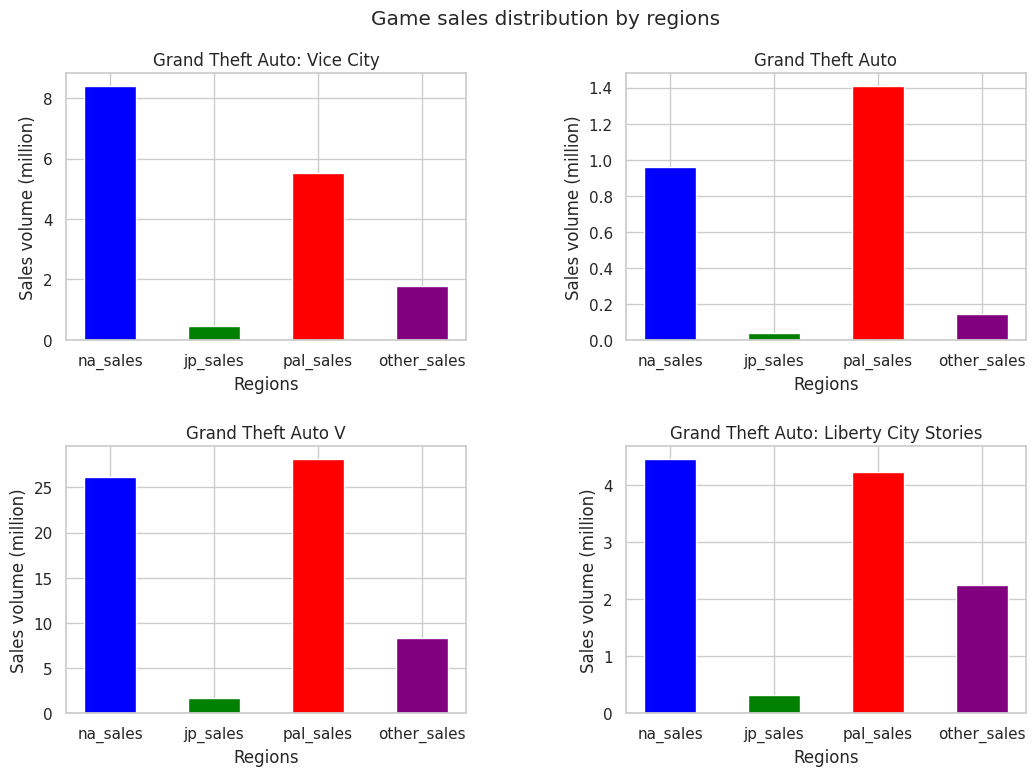

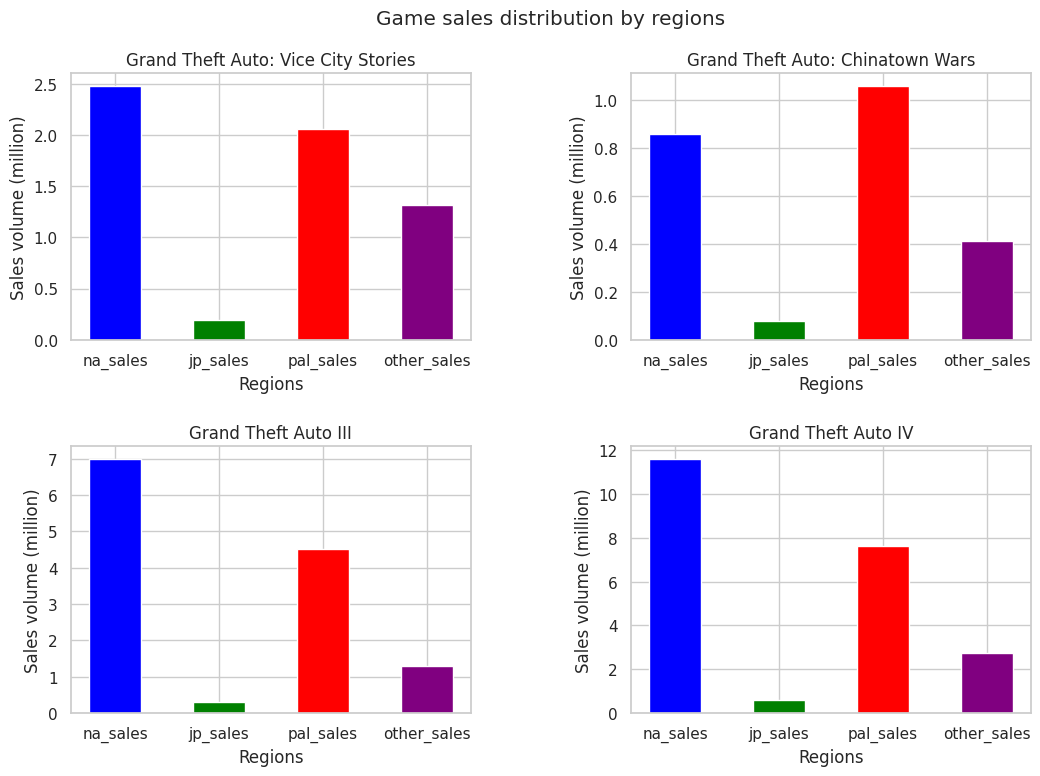

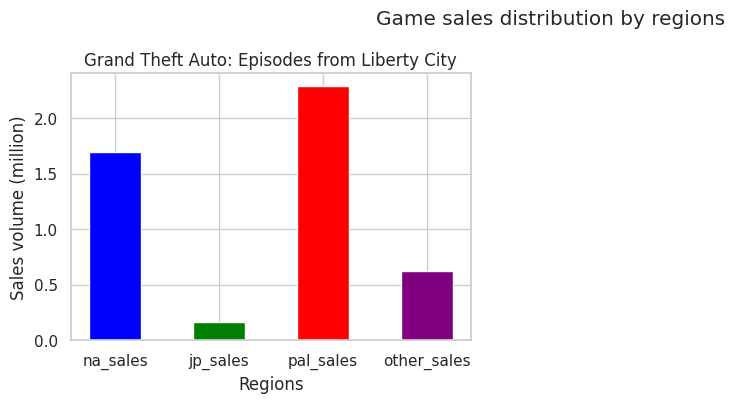

DataFrame[title: string, na_sales: double, jp_sales: double, pal_sales: double, other_sales: double]

In [8]:
games.get_game_sales_by_regions(df, "grand theft auto")

In [11]:
predictions.predict_next_game_performance(spark_session, df, "Battlefield", "PS4")

+-------------+-------+-------+---------------+---------+------------+-----------+--------+--------+---------+-----------+------------+--------------------+
|title        |console|genre  |publisher      |developer|critic_score|total_sales|na_sales|jp_sales|pal_sales|other_sales|release_date|release_date_numeric|
+-------------+-------+-------+---------------+---------+------------+-----------+--------+--------+---------+-----------+------------+--------------------+
|Battlefield 4|PS4    |Shooter|Electronic Arts|EA DICE  |8.3         |3.94       |1.4     |0.19    |1.74     |0.62       |2013-11-15  |1384459200          |
|Battlefield 1|PS4    |Shooter|Electronic Arts|EA DICE  |9.1         |7.26       |2.2     |0.29    |3.65     |1.12       |2016-10-21  |1476997200          |
+-------------+-------+-------+---------------+---------+------------+-----------+--------+--------+---------+-----------+------------+--------------------+



24/06/20 16:50:25 WARN Instrumentation: [e34023c3] regParam is zero, which might cause numerical instability and overfitting.
24/06/20 16:50:25 WARN Instrumentation: [e34023c3] The standard deviation of the label is zero, so the coefficients will be zeros and the intercept will be the mean of the label; as a result, training is not needed.


Root Mean Squared Error (RMSE) on test data for critic_score: 0.8000001907348633


24/06/20 16:50:27 WARN Instrumentation: [80552a31] regParam is zero, which might cause numerical instability and overfitting.
24/06/20 16:50:27 WARN Instrumentation: [80552a31] The standard deviation of the label is zero, so the coefficients will be zeros and the intercept will be the mean of the label; as a result, training is not needed.


Root Mean Squared Error (RMSE) on test data for total_sales: 3.320000171661377


24/06/20 16:50:28 WARN Instrumentation: [76a883d7] regParam is zero, which might cause numerical instability and overfitting.
24/06/20 16:50:28 WARN Instrumentation: [76a883d7] The standard deviation of the label is zero, so the coefficients will be zeros and the intercept will be the mean of the label; as a result, training is not needed.


Root Mean Squared Error (RMSE) on test data for na_sales: 0.8000000715255737


24/06/20 16:50:30 WARN Instrumentation: [94a649c0] regParam is zero, which might cause numerical instability and overfitting.
24/06/20 16:50:30 WARN Instrumentation: [94a649c0] The standard deviation of the label is zero, so the coefficients will be zeros and the intercept will be the mean of the label; as a result, training is not needed.


Root Mean Squared Error (RMSE) on test data for jp_sales: 0.09999999403953552
Predicted Critic Score: 8.300000190734863
Predicted Total Sales: 3.940000057220459
Predicted NA Sales: 1.399999976158142
Predicted JP Sales: 0.1899999976158142


In [ ]:
predictions.predict_next_game_performance_random_tree(spark_session, df, "Call of Duty")

In [ ]:
developers.get_top_developers_by_critic_score(df)

In [ ]:
publisher.get_top_sales_performance_by_publisher(df)